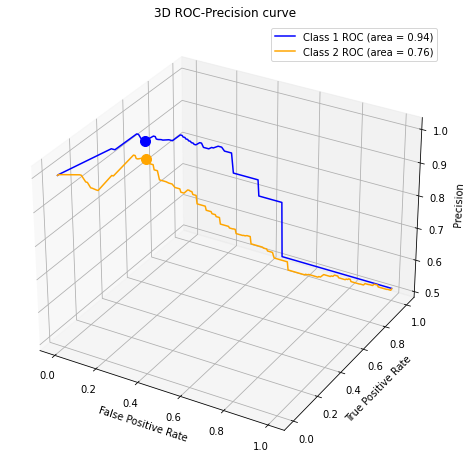

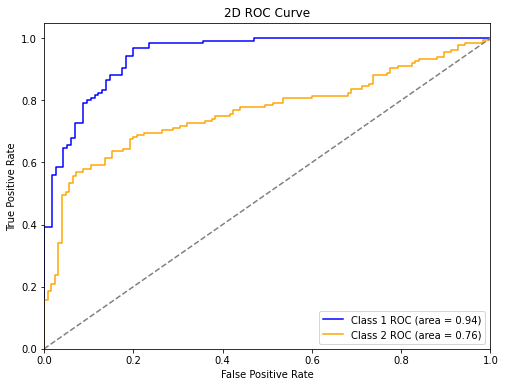

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from approx_thresh import ApproxThreshold

intersect = True
just_thresholds = False

if intersect:
    X1, y1 = make_classification(n_samples=500, n_features=15, n_classes=2, random_state=42, class_sep=1.0)
    X2, y2 = make_classification(n_samples=500, n_features=15, n_redundant=5, n_classes=2, random_state=42, class_sep=0.4)
else:
    X1, y1 = make_classification(n_samples=500, n_features=15, n_classes=2, random_state=42, class_sep=2.0)
    X2, y2 = make_classification(n_samples=500, n_features=15, n_redundant=5, n_classes=2, random_state=42, class_sep=0.5)

A1 = np.ones(y1.shape)
A2 = 2 * np.ones(y2.shape)

X = np.vstack([X1, X2])
y = np.hstack([y1, y2])
A = np.hstack([A1, A2])

X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, y, A, test_size=0.5, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]

clf = LogisticRegression()
model = ApproxThreshold(clf)
model.fit(X_train, y_train, A_train)
predictions = model.predict(X_test, A_test)
model.plot_matplotlib()
model.plot_plotly()
model.plot_2d_roc()
model.plot_performance_comparison(X_test, y_test, A_test)

